In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [4]:
df = pd.read_csv('../myproject/noshow.csv')
df.tail()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
299995,41,M,2014-03-24T09:28:22Z,2014-04-16T00:00:00Z,Wednesday,Show-Up,0,0,1,0,0,0,0,1,-23
299996,67,F,2014-11-21T12:00:36Z,2014-11-25T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4
299997,48,F,2014-07-24T15:46:38Z,2014-07-25T00:00:00Z,Friday,No-Show,0,0,0,0,0,1,0,0,-1
299998,5,M,2015-05-15T09:58:50Z,2015-05-21T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,0,-6
299999,0,M,2015-06-12T14:34:25Z,2015-07-15T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,1,-33


In [5]:
#status no-show - 0, show-up - 1
df['Status'] = df.Status.apply(lambda x : 0 if(x=='No-Show') else 1)
#DayOfTheWeek 0-6 
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfTheWeek'] = df.DayOfTheWeek.apply(lambda x : weekdays.index(x))
#Gender F - 0, M - 1
df['Gender'] = df.Gender.apply(lambda x : 0 if(x=='F') else 1)
#AwaitingTime all positive number
df['AwaitingTime'] = df['AwaitingTime'].map(lambda time : time*(-1))

In [6]:
#column deletion
df1 = df.drop(['AppointmentRegistration','ApointmentData'], axis=1)


In [7]:
df1.tail()

,Age,Gender,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
299995,41,1,2,1,0,0,1,0,0,0,0,1,23
299996,67,0,1,1,1,0,1,0,0,0,0,1,4
299997,48,0,4,0,0,0,0,0,0,1,0,0,1
299998,5,1,3,1,0,0,0,0,0,0,0,0,6
299999,0,1,2,1,0,0,0,0,0,0,0,1,33


In [8]:
#find missing value
df1.isnull().any()

Age             False
Gender          False
DayOfTheWeek    False
Status          False
Diabetes        False
Alcoolism       False
HiperTension    False
Handcap         False
Smokes          False
Scholarship     False
Tuberculosis    False
Sms_Reminder    False
AwaitingTime    False
dtype: bool

In [9]:
#no-show percent
no_show = df1.ix[df.Status == 0]
show = df1.ix[df.Status ==1]
len(no_show)/(len(no_show)*1.0+len(show)*1.0)

0.3024366666666667

In [10]:
df1.describe()

,Age,Gender,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.331650,1.962120,0.697563,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,13.841813
std,22.809014,0.470807,1.394653,0.459314,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,38.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
75%,56.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,113.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,398.000000


In [14]:
df2 = df1.ix[:30000, :]

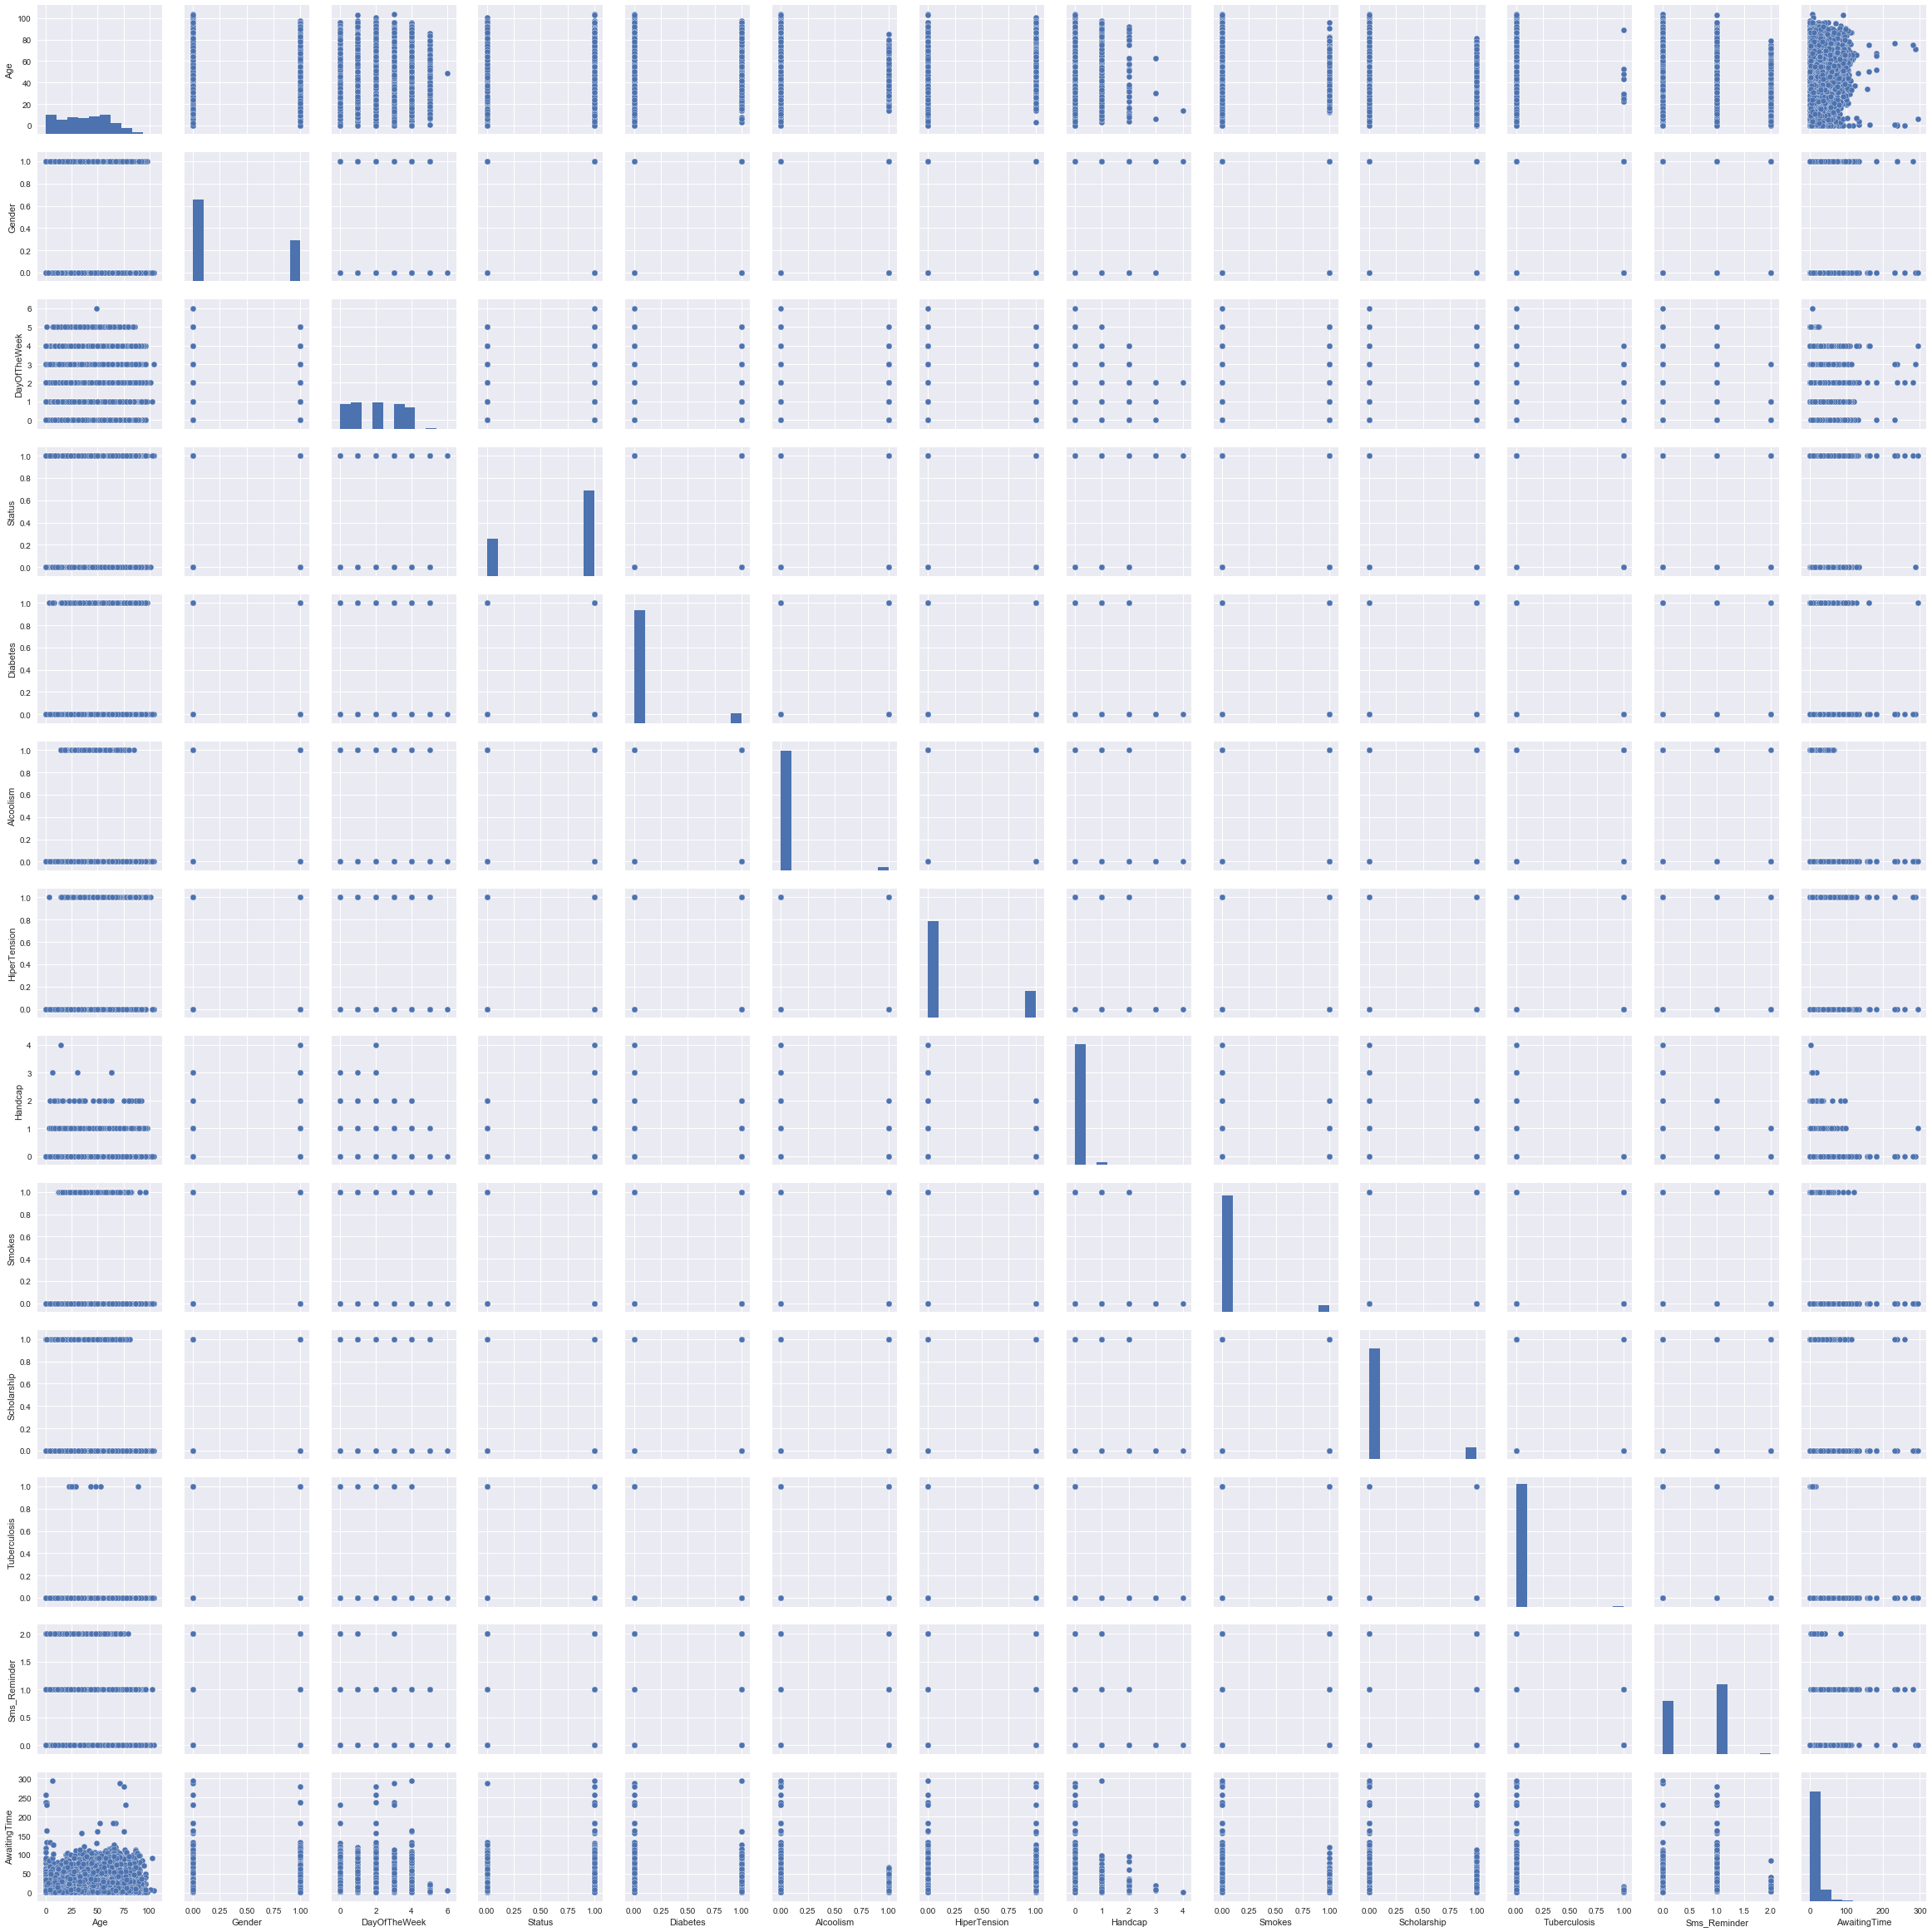

In [15]:
sns.pairplot(df2)
plt.show()

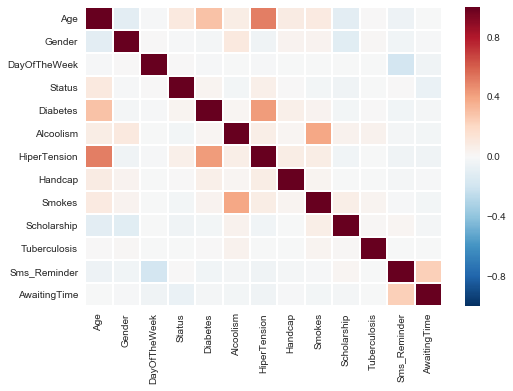

In [16]:
#heatmap
cor = pd.DataFrame.corr(df1.ix[:,:])
sns.heatmap(cor, annot=False, linewidths=1)
plt.show()

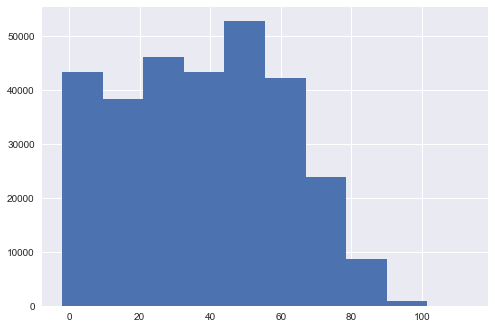

In [13]:
df1['Age'].hist()
plt.show()

In [14]:
# negative number change positive number
minus_age = df1[df1['Age'] < 0]
minus_age.count()

Age             6
Gender          6
DayOfTheWeek    6
Status          6
Diabetes        6
Alcoolism       6
HiperTension    6
Handcap         6
Smokes          6
Scholarship     6
Tuberculosis    6
Sms_Reminder    6
AwaitingTime    6
dtype: int64

In [15]:
def convert_age_(age):
    if int(age) < 0:
        age = age*(-1)
        return age
    else:
        return age

In [16]:
df1['Age'] = df1['Age'].map(lambda age : convert_age_(age))

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=0, shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 11 (0.445712)
2. feature 0 (0.441077)
3. feature 2 (0.061143)
4. feature 10 (0.014447)
5. feature 1 (0.007693)
6. feature 6 (0.007041)
7. feature 5 (0.006912)
8. feature 8 (0.004665)
9. feature 7 (0.004365)
10. feature 3 (0.003333)
11. feature 4 (0.003186)
12. feature 9 (0.000426)


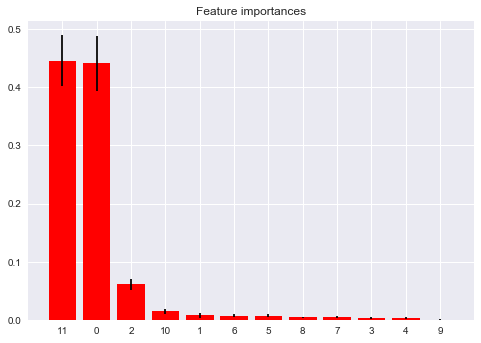

In [19]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
X = df1.drop('Status', axis=1)
y = df1['Status']
forest = ExtraTreesClassifier()
forest.fit(X,y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()



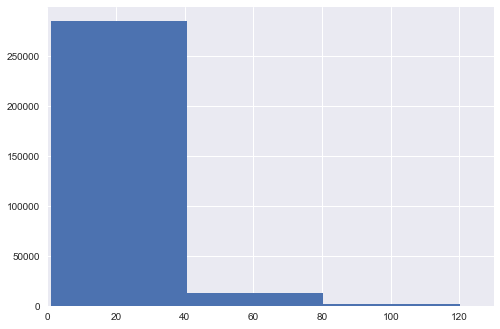

In [21]:
df1['AwaitingTime'].hist()
plt.xlim(0, 130)
plt.show()

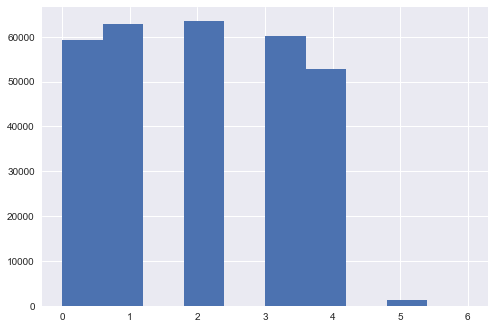

In [25]:
df1['DayOfTheWeek'].hist()
plt.show()

# ML

In [19]:
# Status - target value
X = df1.drop('Status', axis=1)
y = df1['Status']

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
model_score_train = model.score(X_train, y_train)

print "Train Score : ", model_score_train
model_score_test = model.score(X_test, y_test)
print "Test Score : ", model_score_test

Train Score :  0.696736318408
Test Score :  0.698141414141


In [54]:
def score_auc(model, X, y):
    pred = model.predict(X)
    fpr, tpr, thresholds = metrics.roc_curve(y, pred)
    return metrics.auc(fpr, tpr)

In [30]:
from sklearn import metrics
from sklearn.metrics import auc
auc = score_auc(model, X_test, y_test)
auc

0.56207855268257911

In [65]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score_train = rf.score(X_train, y_train)
print "Training score : ",rf_score_train
rf_score_test = rf.score(X_test, y_test)
print "Testing score : ",rf_score_test

Training score :  0.811084577114
Testing score :  0.639262626263


In [57]:
auc = score_auc(rf, X_test, y_test)
model.score(X_train, y_train)

0.69673631840796024